# Adipurush Sentiment Analysis: Harnessing Machine Learning to Understand Twitter Buzz

![adipurush.jpg](attachment:adipurush.jpg)

In [67]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from wordcloud import WordCloud, ImageColorGenerator
from nltk.corpus import stopwords
import warnings
import plotly.express as px
import re
from spellchecker import SpellChecker
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SI
import string
from tqdm.notebook import tqdm
from datetime import datetime
import dateutil.parser
import nltk


import random
warnings.filterwarnings('ignore')

In [22]:
rev= pd.read_csv('rev.csv')

In [25]:
rev.head()

sentiment                                             review
0  Negative  I had no background knowledge of this movie be...
1  Negative  I am a huge Jane Austen fan and I ordered the ...
2  Negative  Nothing to say but Wow! Has anyone actually ha...
3  Negative  i like Jane Austin novels. I love Pride and Pr...
4  Negative  In this day and age of incredible special movi...

In [27]:
rev = rev.drop('sentiment',axis=1)

In [28]:
rev.head()

review
0  I had no background knowledge of this movie be...
1  I am a huge Jane Austen fan and I ordered the ...
2  Nothing to say but Wow! Has anyone actually ha...
3  i like Jane Austin novels. I love Pride and Pr...
4  In this day and age of incredible special movi...

In [29]:
rev.duplicated().sum()
rev.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [30]:
rev = rev.drop_duplicates()

In [34]:
rev.info()
rev.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 9990 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  9990 non-null   object
dtypes: object(1)
memory usage: 156.1+ KB


review
count                                                9990
unique                                               9990
top     I had no background knowledge of this movie be...
freq                                                    1

In [37]:
nltk.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [39]:
languages = stopwords.fileids()

In [41]:
eng = stopwords.words('english')
#hinglish_stopwords = stopwords.words('hinglish')

In [50]:
!pip install -q langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 17.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [62]:
from langdetect import detect

def detect_language(text):
    try:
        lang = detect(text)
        return lang
    except:
        return None

rev['Lang'] = rev['review'].apply(detect_language)

In [55]:
rev

review Language
0     I had no background knowledge of this movie be...       en
1     I am a huge Jane Austen fan and I ordered the ...       en
2     Nothing to say but Wow! Has anyone actually ha...       en
3     i like Jane Austin novels. I love Pride and Pr...       en
4     In this day and age of incredible special movi...       en
...                                                 ...      ...
9995  I first saw this movie back in the early'90's ...       en
9996  NYC, 2022: The Greenhouse effect, vanished oce...       en
9997  Those individuals familiar with Asian cinema, ...       en
9998  The kids, aged 7 to 14, got such a huge kick o...       en
9999  I so love this movie! The animation is great (...       en

[9990 rows x 2 columns]

In [71]:
sc = SpellChecker()
def labelSentiment(x:float):
    if x < -0.05 : return 'negative'
    if x > 0.35 : return 'positive'
    return 'neutral'

In [73]:
sia = SI()
rev['sentiment'] = [sia.polarity_scores(x)['compound'] for x in tqdm(rev['review'])]
rev['overallSentiment'] = rev['sentiment'].apply(labelSentiment);

  0%|          | 0/9989 [00:00<?, ?it/s]

In [74]:
rev

review Language Lang  \
0     I had no background knowledge of this movie be...       en   en   
1     I am a huge Jane Austen fan and I ordered the ...       en   en   
2     Nothing to say but Wow! Has anyone actually ha...       en   en   
3     i like Jane Austin novels. I love Pride and Pr...       en   en   
4     In this day and age of incredible special movi...       en   en   
...                                                 ...      ...  ...   
9995  I first saw this movie back in the early'90's ...       en   en   
9996  NYC, 2022: The Greenhouse effect, vanished oce...       en   en   
9997  Those individuals familiar with Asian cinema, ...       en   en   
9998  The kids, aged 7 to 14, got such a huge kick o...       en   en   
9999  I so love this movie! The animation is great (...       en   en   

      sentiment overallSentiment  
0       -0.9813         negative  
1        0.8490         positive  
2       -0.1977         negative  
3        0.9355         positive  
4        0.9360         positive  
...         ...              ...  
9995     0.7985         positive  
9996     0.3759         positive  
9997    -0.9788         negative  
9998     0.9792         positive  
9999     0.9900         positive  

[9989 rows x 5 columns]

In [83]:
rev['overallSentiment'].nunique()
rev['overallSentiment'].value_counts()

overallSentiment
positive    6193
negative    3418
neutral      378
Name: count, dtype: int64

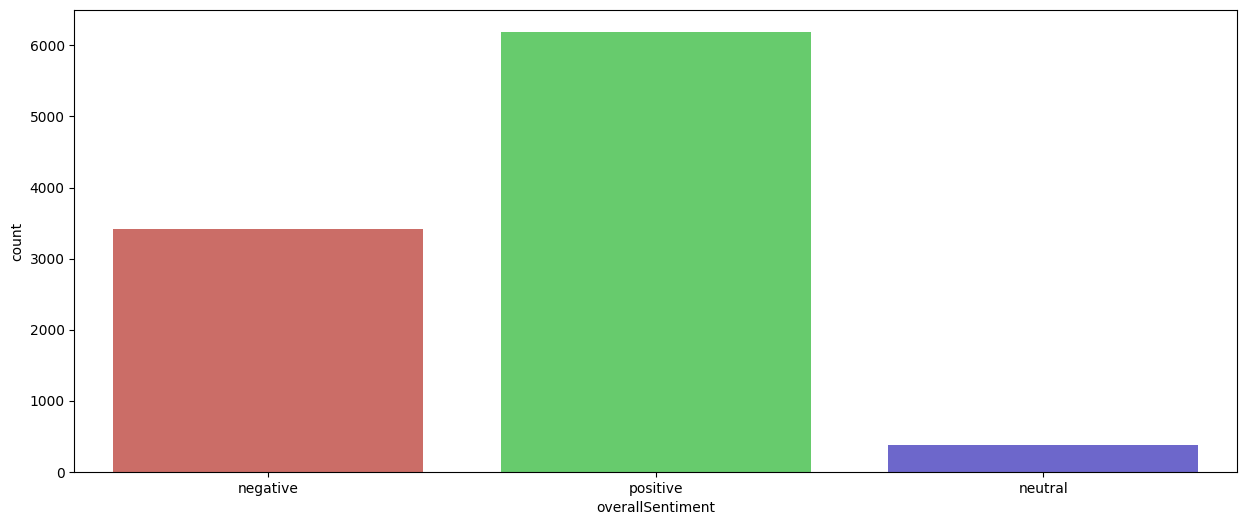

In [79]:
plt.figure(figsize=(15,6))
sn.countplot(x=rev['overallSentiment'], data = rev, palette = 'hls')
plt.xticks(rotation = 0)
plt.show()

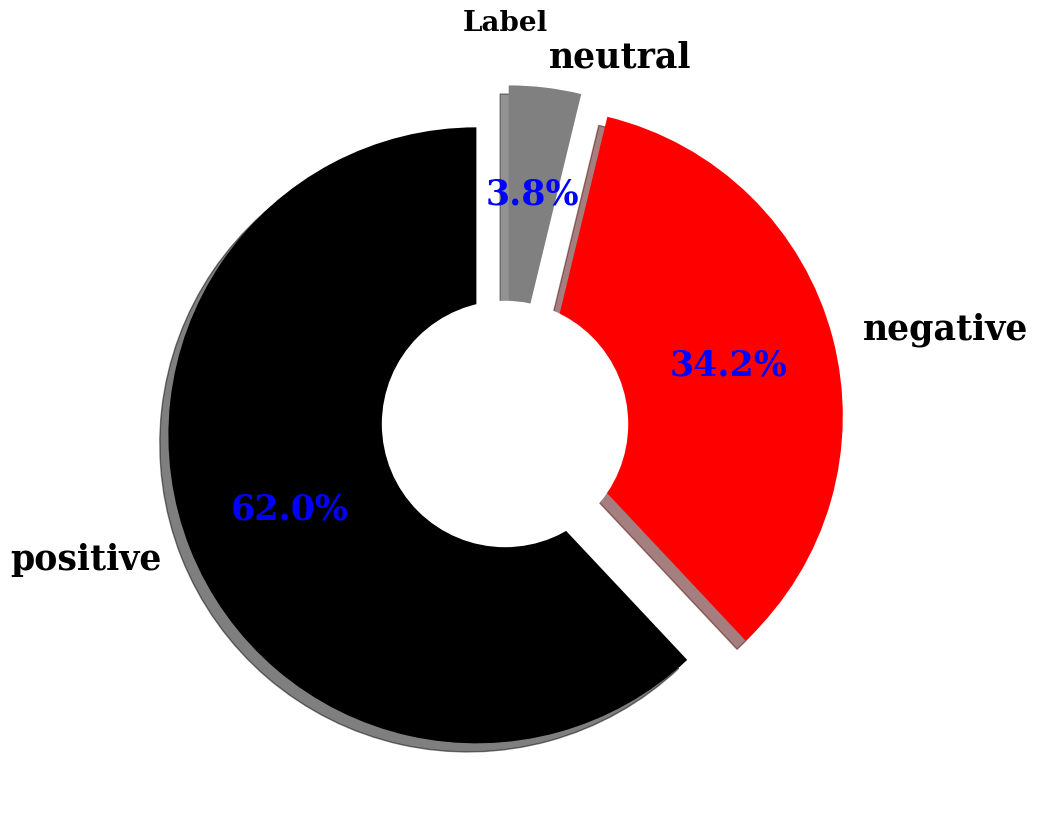

In [99]:
labelData = rev['overallSentiment'].value_counts()

explode = (0.1, 0.1, 0.1)
plt.figure(figsize=(14, 10))
patches, texts, pcts = plt.pie(labelData,
                               labels = labelData.index,
                               colors = ['black', 'red', 'grey'],
                               pctdistance = 0.65,
                               shadow = True,
                               startangle = 90,
                               explode = explode,
                               autopct = '%1.1f%%',
                               textprops={ 'fontsize': 25,
                                           'color': 'black',
                                           'weight': 'bold',
                                           'family': 'serif' })
plt.setp(pcts, color='blue')

hfont = {'fontname':'serif', 'weight': 'bold'}
plt.title('Label', size=20, **hfont)

centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

In [101]:
import plotly.graph_objects as go
counts = rev['overallSentiment'].value_counts()
fig = go.Figure(data=[go.Pie(labels=counts.index, values=counts)])
fig.update_layout(title= 'Overall Sentiment')
fig.show()

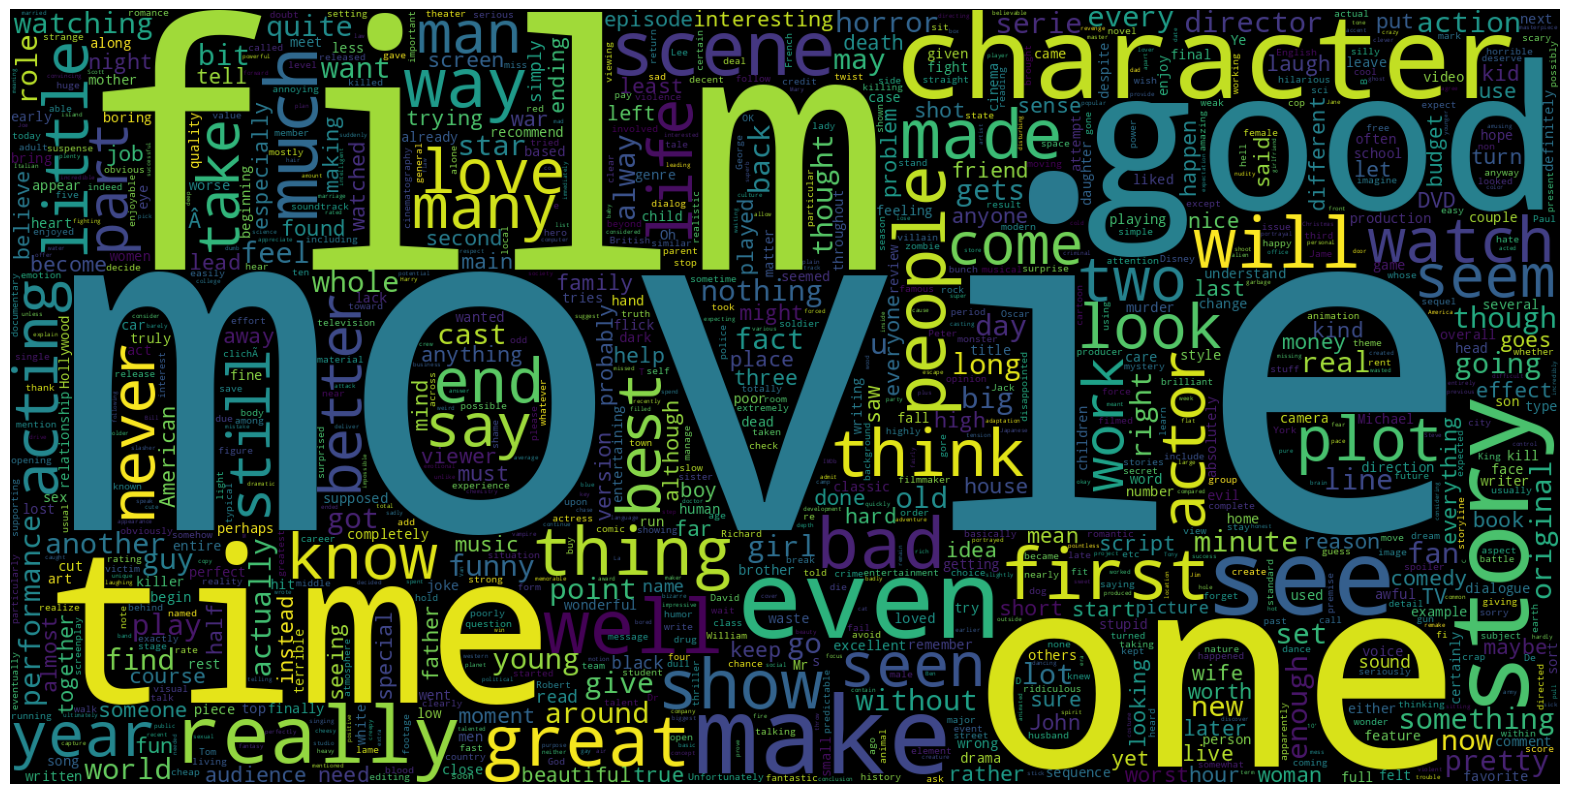

In [103]:
from wordcloud import WordCloud
data = rev['review']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data))
plt.imshow(wc)
plt.axis('off')
plt.show()

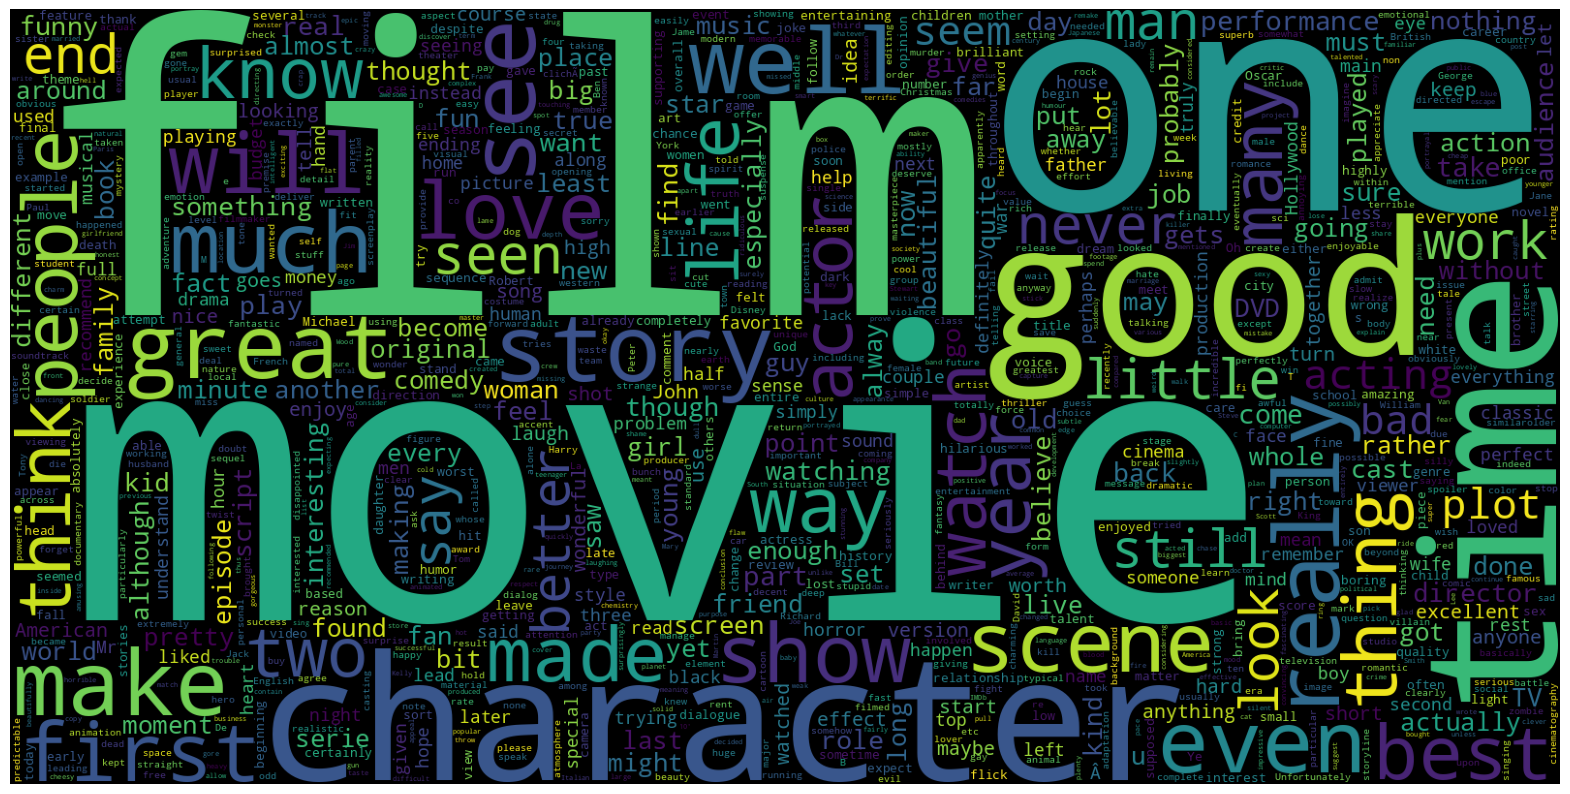

In [105]:
data = rev[rev['overallSentiment']=="positive"]['review']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data))
plt.imshow(wc)
plt.axis('off')
plt.show()

from PIL import Image
import numpy as np
data = df3[df3['overall_sentiment'] == "positive"]['Cleaned_English_Tweets']
text = " ".join(data)
wordcloud = WordCloud(max_words=1000, width=1600, height=800, collocations=False).generate(text)
image = wordcloud.to_image()
image_array = np.array(image)
fig = go.Figure(data=go.Image(z=image_array))
fig.update_layout(title_text="Word Cloud - Positive Tweets", width=800, height=600)
fig.show()

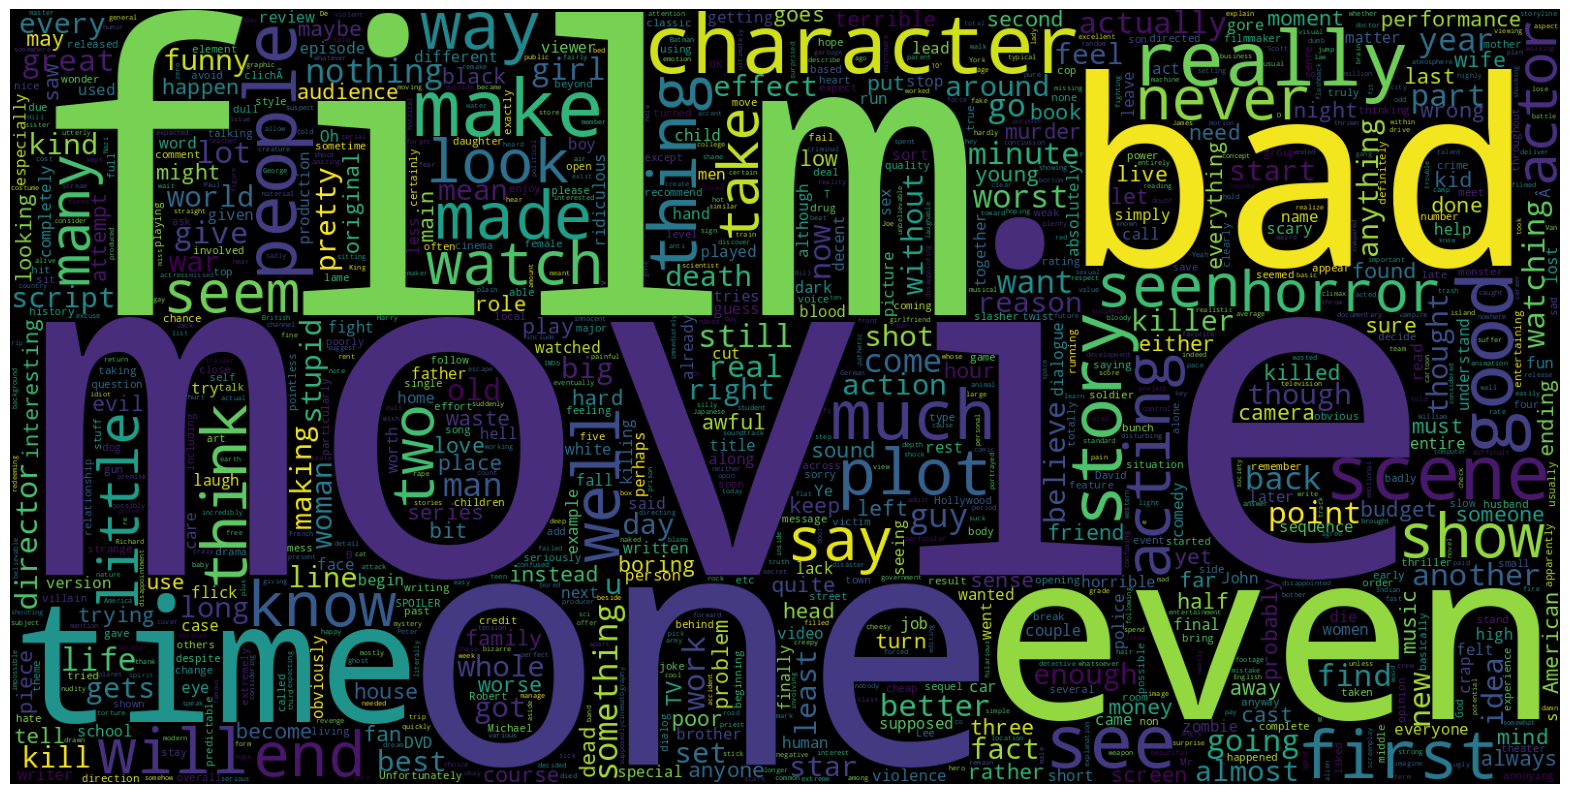

In [106]:
data = rev[rev['overallSentiment']=="negative"]['review']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data))
plt.imshow(wc)
plt.axis('off')
plt.show()

from PIL import Image
import numpy as np
data = df3[df3['overall_sentiment'] == "negative"]['Cleaned_English_Tweets']
text = " ".join(data)
wordcloud = WordCloud(max_words=1000, width=1600, height=800, collocations=False).generate(text)
image = wordcloud.to_image()
image_array = np.array(image)
fig = go.Figure(data=go.Image(z=image_array))
fig.update_layout(title_text="Word Cloud - Negative Tweets", width=800, height=600)
fig.show()

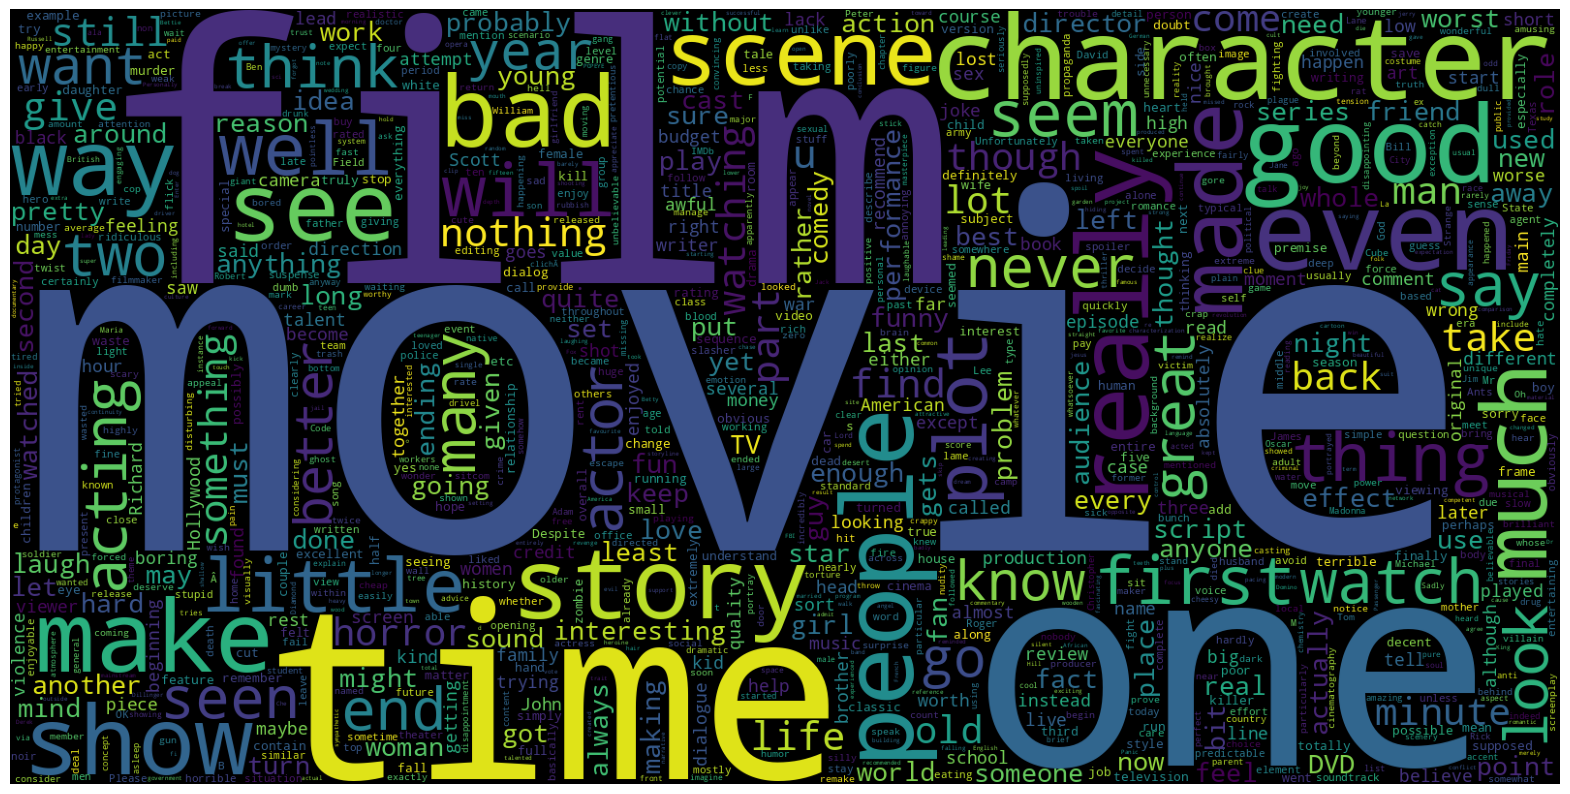

In [108]:
data = rev[rev['overallSentiment']=="neutral"]['review']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data))
plt.imshow(wc)
plt.axis('off')
plt.show()

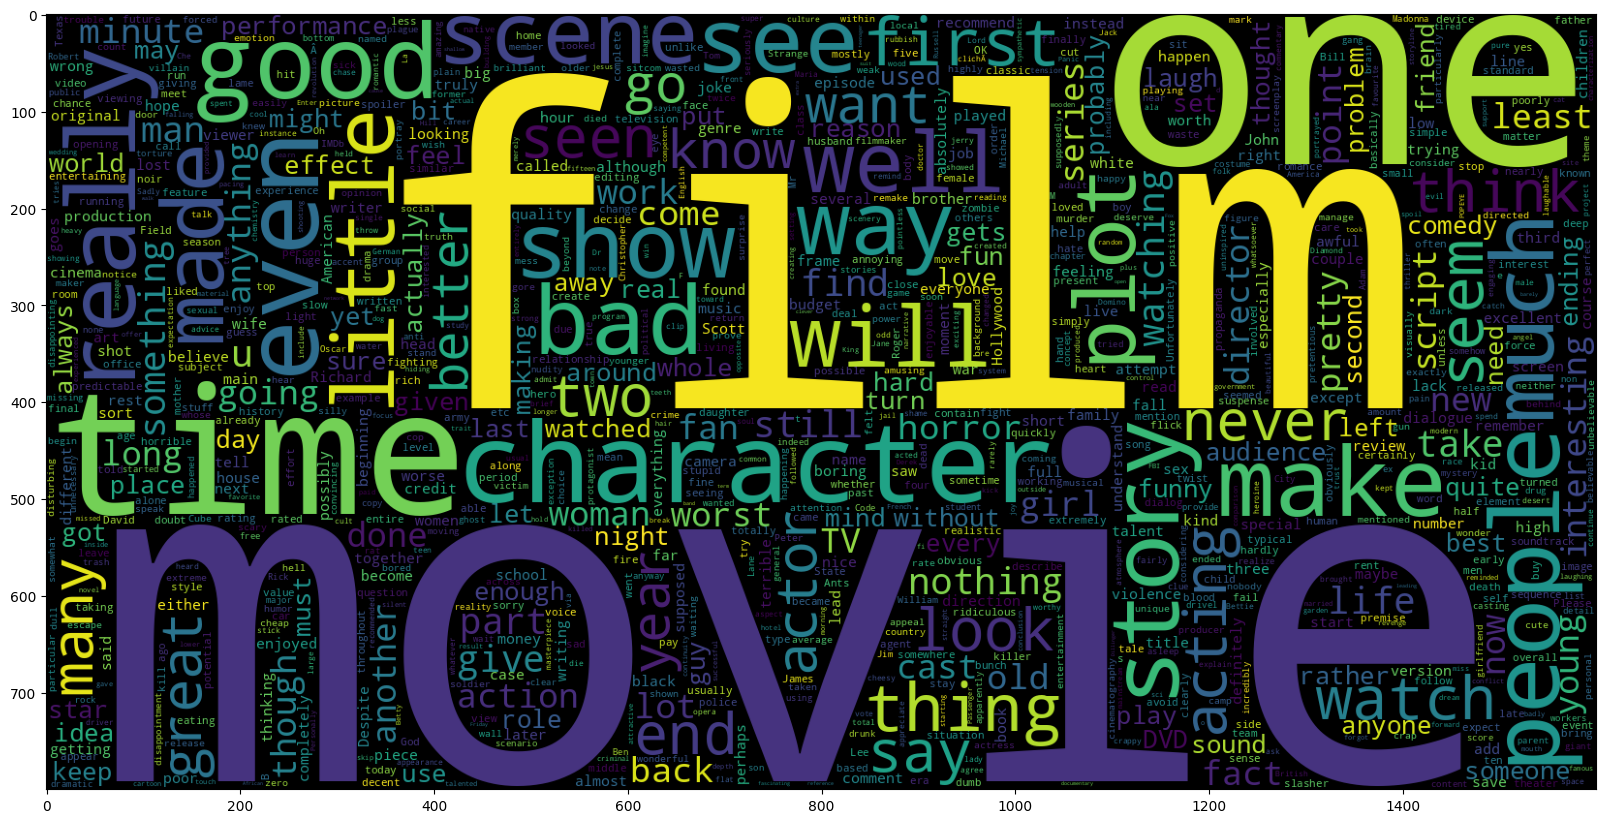

In [109]:
data = rev[rev['overallSentiment']=="neutral"]['review']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data))
plt.imshow(wc)
plt.axis('on')
plt.show()

import numpy as np
data = df3[df3['overall_sentiment'] == "neutral"]['Cleaned_English_Tweets']
text = " ".join(data)
wordcloud = WordCloud(max_words=1000, width=1600, height=800, collocations=False).generate(text)
image = wordcloud.to_image()
image_array = np.array(image)
fig = go.Figure(data=go.Image(z=image_array))
fig.update_layout(title_text="Word Cloud - Neutral Tweets", width=800, height=600)
fig.show()

In [112]:
x,y = rev['review'], rev['overallSentiment']

print(len(x)== len(y))

True


In [114]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)
print(len(x_train)== len(y_train))
print(len(x_test)== len(y_test))

True
True


In [115]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()
vect.fit(x_train)

CountVectorizer()

In [116]:
x_train_d = vect.transform(x_train)
x_test_d = vect.transform(x_test)

In [117]:
vect_tunned = CountVectorizer(stop_words='english', ngram_range=(1,2), min_df=0.1, max_df=0.7, max_features=100)

In [118]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()

tfidf_transformer.fit(x_train_d)
x_train_tfidf = tfidf_transformer.transform(x_train_d)

x_train_tfidf

<7491x46090 sparse matrix of type '<class 'numpy.float64'>'
	with 1027967 stored elements in Compressed Sparse Row format>

In [119]:
txts = rev['review']
trget = rev['overallSentiment']

In [120]:
from keras.preprocessing.text import Tokenizer

In [122]:
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(txts)

vocab_length = len(word_tokenizer.word_index) + 1
vocab_length

65956

In [123]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.tokenize import word_tokenize

In [124]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [128]:
def embed(corpus):

    corpus = [text.tokens if isinstance(text, nltk.Text) else text for text in corpus]
    return word_tokenizer.texts_to_sequences(corpus)

longest_train = max(txts, key=lambda sentence: len(word_tokenize(sentence)))
length_long_sentence = len(word_tokenize(longest_train))


train_padded_sentences = pad_sequences(
    embed(txts),
    length_long_sentence,
    padding='post'
)

train_padded_sentences

array([[   9,   64,   54, ...,    0,    0,    0],
       [   9,  248,    3, ...,    0,    0,    0],
       [ 149,    5,  134, ...,    0,    0,    0],
       ...,
       [ 143, 3952, 1168, ...,    0,    0,    0],
       [   1,  347, 2505, ...,    0,    0,    0],
       [   9,   32,  115, ...,    0,    0,    0]], dtype=int32)

In [129]:
import numpy as np

In [132]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(x_train_d, y_train)

MultinomialNB()

In [133]:
y_pred_class = nb.predict(x_test_d)
y_pred_prob = nb.predict_proba(x_test_d)[:, 1]

In [134]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.7630104083266613


In [135]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

pipe = Pipeline([('bow', CountVectorizer()),
                 ('tfid', TfidfTransformer()),
                 ('model', MultinomialNB())])

In [136]:
pipe.fit(x_train, y_train)

y_pred_class = pipe.predict(x_test)

print(metrics.accuracy_score(y_test, y_pred_class))

0.6188951160928743


In [138]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [139]:
X_train, X_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)

In [140]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfid', TfidfTransformer()),
                ('model', MultinomialNB())])

In [141]:
y_pred = pipe.predict(X_test)

In [142]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print('Test accuracy:', acc)

Test accuracy: 0.6151151151151151
